In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp
import treecorr

In [3]:
NSIDE = 1
npix_healpy = hp.nside2npix(nside=NSIDE)
print(npix_healpy)

12


In [4]:
npix = 12*NSIDE**2 # write the relevant equation from the manual and compare the value of npix with npix_healpy above
print(npix)

12


In [5]:
map_arr = np.arange(npix)
print(map_arr)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


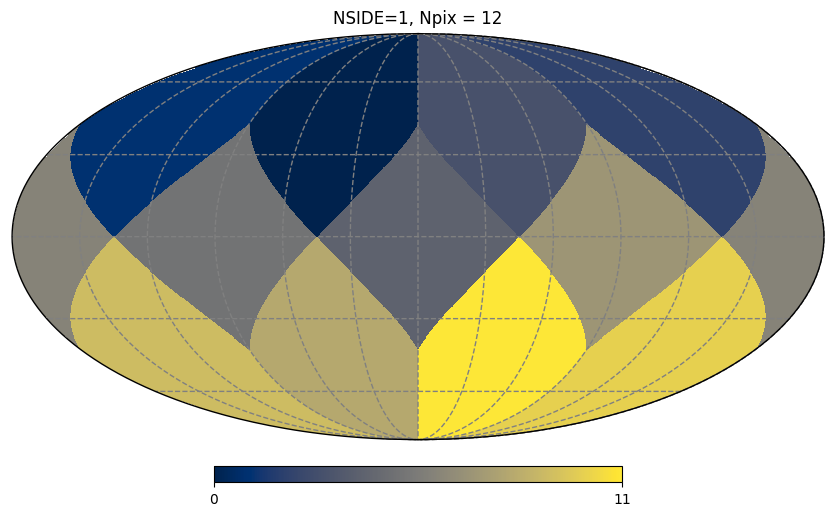

In [15]:
hp.mollview(map_arr,title = f'NSIDE={NSIDE}, Npix = {npix}', cmap= 'cividis')
hp.graticule(color = 'gray', linestyle = '--', linewidth = 1.2)

plt.savefig('moll_NSIDEof1')

In [32]:
# Pixel area in square radians
pix_area_healpy = hp.nside2pixarea(NSIDE)

# Pixel area in square degrees
pix_area_healpy_deg = hp.nside2pixarea(NSIDE, degrees=True)

# Pixel area in square arcminutes
pix_area_healpy_arcmin = pix_area_healpy_deg * 3600

# Calculate theta_pixel (characteristic angular size per pixel)
# theta_pixel = sqrt(pixel area)
theta_pixel_deg = np.sqrt(pix_area_healpy_deg)
theta_pixel_arcmin = np.sqrt(pix_area_healpy_arcmin)

print("Pixel area (sq. rad):", pix_area_healpy)
print("Pixel area (sq. deg):", pix_area_healpy_deg)
print("Pixel area (sq. arcmin):", pix_area_healpy_arcmin)
print("Theta_pixel (deg):", theta_pixel_deg)
print("Theta_pixel (arcmin):", theta_pixel_arcmin)

Pixel area (sq. rad): 1.0471975511965976
Pixel area (sq. deg): 3437.746770784939
Pixel area (sq. arcmin): 12375888.374825781
Theta_pixel (deg): 58.63230142835039
Theta_pixel (arcmin): 3517.9380857010233


In [17]:
pix_area_manual = npix * 1/(4*np.pi)
pix_area_healpy

1.0471975511965976

In [34]:
NSIDE_vals = [2**1, 2**2, 2**3, 2**11]
npix_vals = []
pix_area_manual_vals = []
pix_theta_vals_degree = []
pix_theta_vals_arcmins = []

for nside_vals in NSIDE_vals:
    n_pix_vals = 12 * nside_vals**2
    pix_area_manual = 1 / n_pix_vals  # pixel area as fraction of sphere
    npix_vals.append(n_pix_vals)
    pix_area_manual_vals.append(pix_area_manual)
    
    # Calculate theta_pixel in degrees and arcminutes
    total_sphere_area_deg2 = 4 * np.pi * (180 / np.pi)**2  # total sphere area in square degrees
    pix_area_deg = pix_area_manual * total_sphere_area_deg2
    theta_pixel_deg = np.sqrt(pix_area_deg)
    theta_pixel_arcmin = theta_pixel_deg * 60
    pix_theta_vals_degree.append(theta_pixel_deg)
    pix_theta_vals_arcmins.append(theta_pixel_arcmin)


print(pix_theta_vals_degree)
print(pix_theta_vals_arcmins)

[np.float64(29.316150714175198), np.float64(14.658075357087599), np.float64(7.329037678543799), np.float64(0.028629053431811716)]
[np.float64(1758.9690428505119), np.float64(879.4845214252559), np.float64(439.74226071262797), np.float64(1.717743205908703)]


In [35]:
plt.figure(figsize=(12, 8))

for i, nside in enumerate(NSIDE_vals):
    npix = hp.nside2npix(nside)
    map_arr = np.arange(npix)
    # Use the sub parameter: (nrows, ncols, plot_number)
    hp.mollview(map_arr,title = f'NSIDE={nside}')
    hp.graticule()
    plt.savefig(f'formoll{nside}')
    plt.close()

<Figure size 1200x800 with 0 Axes>

total pixels in disc =50331648
total pixels in selected patch =23948


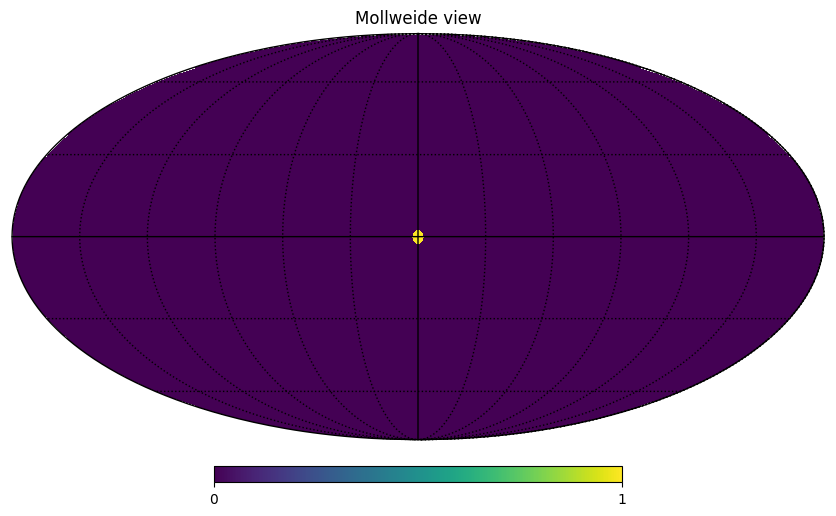

In [37]:
NSIDE_fix = NSIDE_vals[3]
#choose patch radius:
radius_degree =  2.5
radius_rad = np.radians(radius_degree)
#center = 0 (north pole) and pi/2 (equator), need in radians
thetha_center = 0 #,equator ,can change
phi_center = 0 #,north pole, can change
#convert this to a 3D unit vector
vec_center = hp.ang2vec(thetha_center, phi_center, lonlat=True) #lonlat = True = lon lat given in degrees
#find all the pixels withing the define angular radius
pix_in_disc = hp.query_disc(NSIDE_fix , vec_center , radius_rad , inclusive= False)
#make a map highlighting the selected patch
map_disc = np.zeros(hp.nside2npix(NSIDE_fix))
#all pixels inside selected patch =1, others 0
map_disc[pix_in_disc] = 1
print(f'total pixels in disc ={hp.nside2npix(NSIDE_fix)}')
print(f'total pixels in selected patch ={len(pix_in_disc)}')
#mollview
hp.mollview(map_disc)
hp.graticule()
plt.savefig('patch1.png')

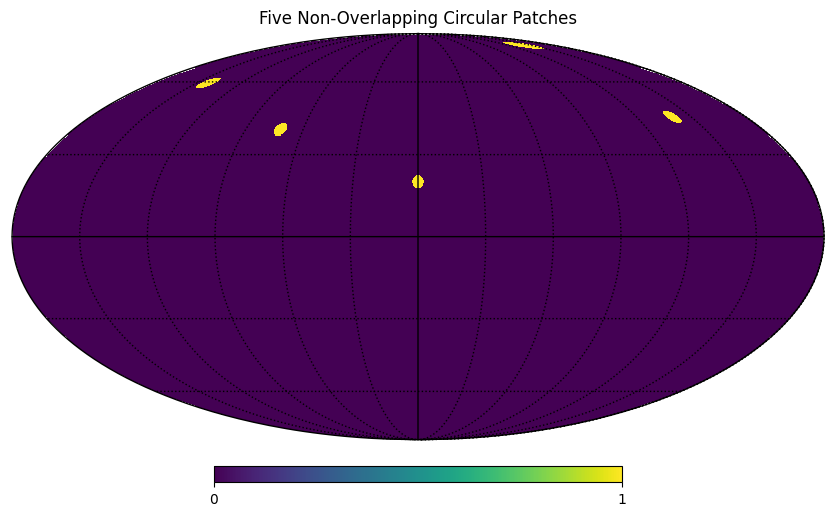

In [38]:
#latitude = thetha between - + 90
theta_degs = [20, 40, 60, 80, 45]
phi_degs = [0, 72, 144, 216, 220]  # spread around longitude

map_multi = np.zeros(hp.nside2npix(NSIDE_fix))

for t_deg, p_deg in zip(theta_degs, phi_degs):
    vec = hp.ang2vec(p_deg, t_deg, lonlat=True)
    disc_pix = hp.query_disc(NSIDE_fix, vec, radius_rad)
    map_multi[disc_pix] = 1

hp.mollview(map_multi, title="Five Non-Overlapping Circular Patches")
hp.graticule()
plt.savefig('patch2.png')

Number of pixels: 50331648
NSIDE: 2048


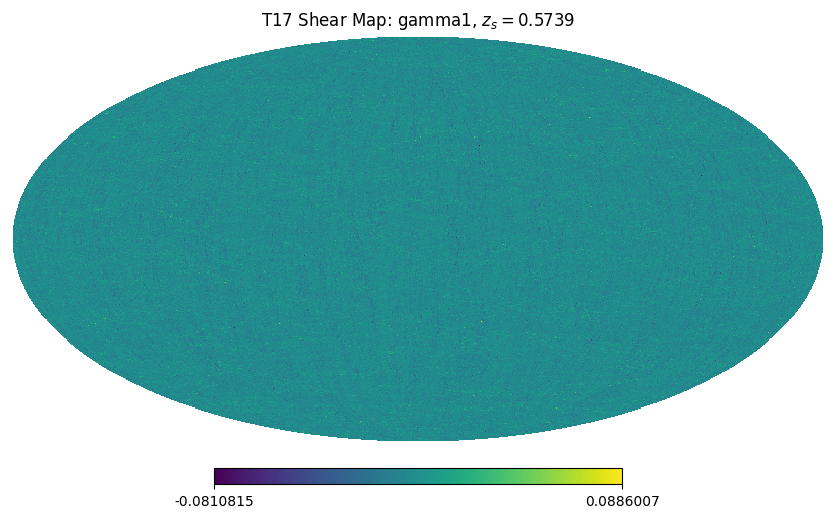

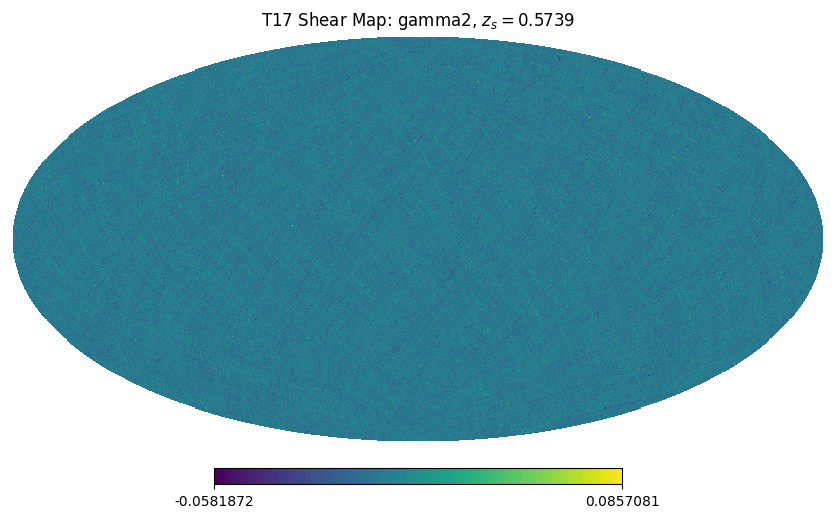

In [40]:
gamma1_file = "T17_simulation_WL_shear_data/allskymap_NSIDE2048_r000_zsource_0.5739_gamma1.fits"
gamma2_file = "T17_simulation_WL_shear_data/allskymap_NSIDE2048_r000_zsource_0.5739_gamma2.fits"

# Load the maps using healpy
gamma1_map = hp.read_map(gamma1_file)
gamma2_map = hp.read_map(gamma2_file)

# Check the number of pixels and corresponding NSIDE
npix = len(gamma1_map)
nside = hp.npix2nside(npix)
print(f"Number of pixels: {npix}")
print(f"NSIDE: {nside}")

# Visualize the maps
hp.mollview(gamma1_map, title="T17 Shear Map: gamma1, $z_s=0.5739$")
plt.savefig('T17gam1.png')
plt.show()

hp.mollview(gamma2_map, title="T17 Shear Map: gamma2, $z_s=0.5739$")
plt.savefig('T17gam2.png')

plt.show()


In [50]:
def pixel2RaDec(pixel_indices, NSIDE):
    theta, phi = hp.pixelfunc.pix2ang(NSIDE, pixel_indices, nest=False)
    ra = phi
    dec = np.pi/2.0-theta
    return ra, dec
ra_rad, dec_rad = pixel2RaDec(pix_in_disc, NSIDE_fix)
ra_deg = np.degrees(ra_rad)
dec_deg = np.degrees(dec_rad)
#associated gamma1 and gamma2 from extracted pixels
gamma1_disc = gamma1_map[pix_in_disc]
gamma2_disc = gamma1_map[pix_in_disc]


In [51]:
cat = treecorr.Catalog(ra= ra_deg , dec= dec_deg , g1= gamma1_disc , g2= gamma2_disc , ra_units = 'deg' , dec_units = 'deg' , flip_g1 = True )

In [52]:
print("Tree catalog created with" , cat.nobj, "objects")

Tree catalog created with 23952 objects


In [53]:
#create 20 equally spaced logarithmic bins 
min_sep = 5
max_sep = 140
nbins = 20
#gg correaltion object
gg = treecorr.GGCorrelation(min_sep = min_sep , max_sep = max_sep, nbins = bins)

In [54]:
#compute the correlation function
gg.process(cat)

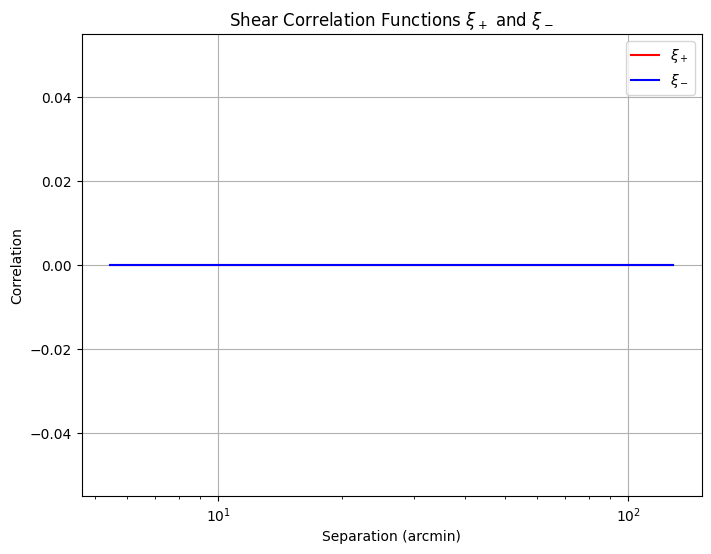

In [55]:
#gg.xip and gg.xim are correlation values eta+ eta-
xip_values = gg.xip
xim_values = gg.xim
rnom_values = gg.rnom #gives normal bin centers (angular seperations)
#correlation function v/s angular separations
plt.figure(figsize=(8,6))
plt.plot(rnom_values, xip_values ,c='r', label=r'$\xi_+$')
plt.plot(rnom_values, xim_values, c='b', label=r'$\xi_-$')
plt.xscale('log')
plt.xlabel('Separation (arcmin)')
plt.ylabel('Correlation')
plt.title('Shear Correlation Functions $\\xi_+$ and $\\xi_-$')
plt.legend()
plt.grid(True)
plt.show()
#If your selected patch is small or contains random shear values (as can happen in a small disc or a
#region with little signal), the correlation functions eta+and eta− will average to zero.

Number of pixels: 50331648
NSIDE: 2048


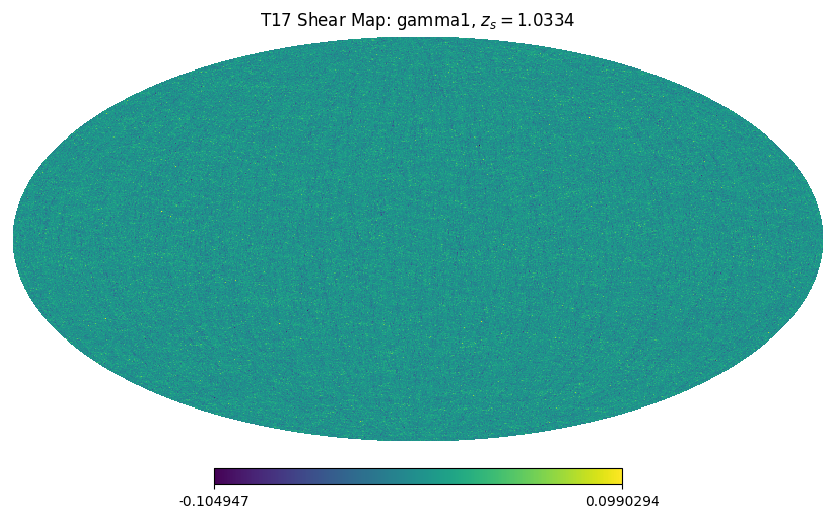

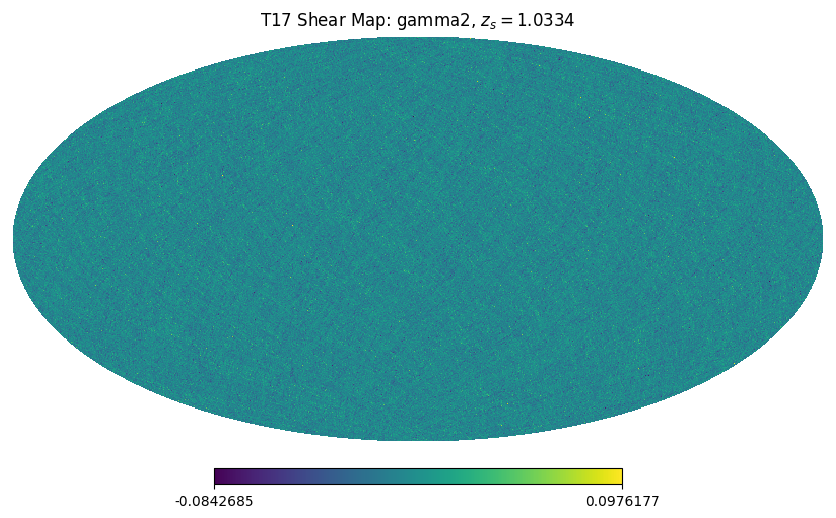

gamma1_disc_2 =  [ 0.00105982  0.00235406 -0.00209448 ...  0.00242922  0.00872073
  0.00354656]
gamma2_disc_2 =  [-0.0041424  -0.00924665  0.00744772 ...  0.0028234   0.00177782
 -0.00386974]
Tree catalog created with 23952 objects
xip_arr shape: (100, 20)
xim_arr shape: (100, 20)
Mean xi_+: [5.85093674e-05 5.01725861e-05 4.40000350e-05 3.81950378e-05
 3.31712548e-05 2.89666109e-05 2.53535435e-05 2.21254981e-05
 1.93161642e-05 1.68075451e-05 1.45335345e-05 1.24762461e-05
 1.06718861e-05 8.94258368e-06 7.47556420e-06 6.18744323e-06
 4.82339250e-06 3.62661428e-06 2.86050884e-06 2.22471461e-06]
Std xi_+: [1.12689601e-05 1.05031316e-05 9.52097130e-06 8.81443727e-06
 8.35002342e-06 7.89076686e-06 7.52821352e-06 7.21010271e-06
 6.77921571e-06 6.48671871e-06 6.24812652e-06 6.08916524e-06
 5.74358615e-06 5.49975341e-06 5.22950898e-06 4.91960853e-06
 4.64483969e-06 4.25698372e-06 4.10435956e-06 4.04062180e-06]
Mean xi_-: [2.30477378e-05 2.29079366e-05 2.16283792e-05 2.01888177e-05
 1.84128955e-

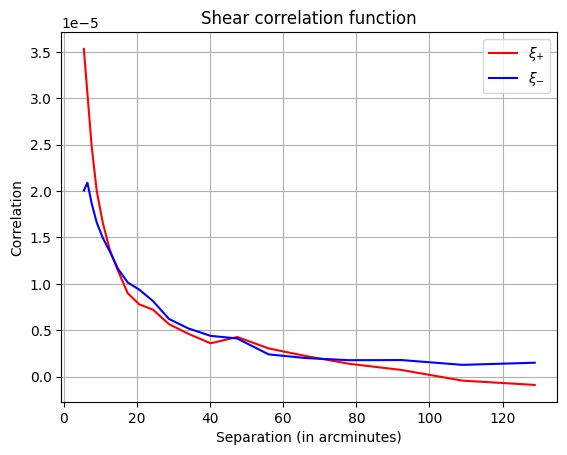

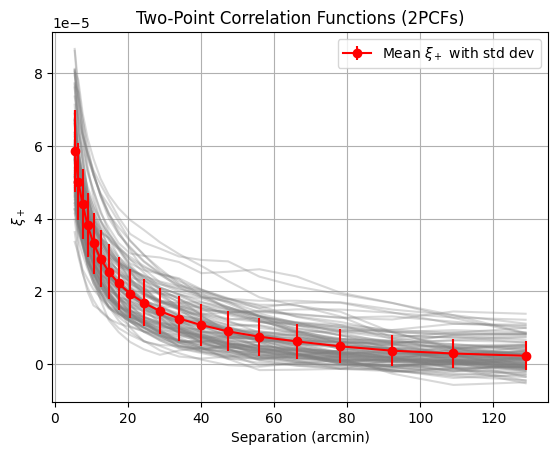

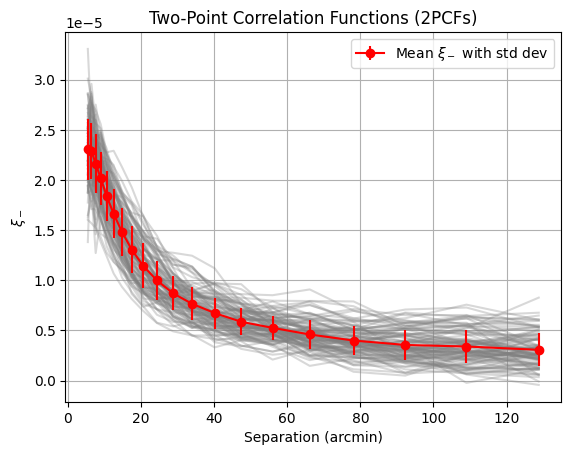

In [56]:
gamma1_file_2 = "T17_simulation_WL_shear_data/allskymap_NSIDE2048_r000_zsource_1.0334_gamma1.fits"
gamma2_file_2 = "T17_simulation_WL_shear_data/allskymap_NSIDE2048_r000_zsource_1.0334_gamma2.fits"

# Load the maps using healpy
gamma1_map_2 = hp.read_map(gamma1_file_2)
gamma2_map_2 = hp.read_map(gamma2_file_2)

# Check the number of pixels and corresponding NSIDE
npix = len(gamma1_map_2)
nside = hp.npix2nside(npix)
print(f"Number of pixels: {npix}")
print(f"NSIDE: {nside}")

# Visualize the maps
hp.mollview(gamma1_map_2, title="T17 Shear Map: gamma1, $z_s=1.0334$")
plt.show()

hp.mollview(gamma2_map_2, title="T17 Shear Map: gamma2, $z_s=1.0334$")
plt.show()

def pixel2RaDec(pixel_indices, NSIDE):
    theta, phi = hp.pixelfunc.pix2ang(NSIDE, pixel_indices, nest=False)
    ra = phi
    dec = np.pi/2.0-theta
    return ra, dec
ra_rad, dec_rad = pixel2RaDec(pix_in_disc, NSIDE_fix)
ra_deg = np.degrees(ra_rad)
dec_deg = np.degrees(dec_rad)
# associated gamma1 and gamma2 from extracted pixels
gamma1_disc_2 = gamma1_map_2[pix_in_disc]
gamma2_disc_2 = gamma2_map_2[pix_in_disc]

print("gamma1_disc_2 = ", gamma1_disc_2)
print("gamma2_disc_2 = ", gamma2_disc_2)


cat_2 = treecorr.Catalog(ra = ra_deg, dec = dec_deg, g1=gamma1_disc_2, g2 = gamma2_disc_2, ra_units='deg', dec_units='deg', flip_g1=True)


min_sep = 5
max_sep = 140
nbins = 20
gg = treecorr.GGCorrelation(min_sep = min_sep, max_sep = max_sep, nbins = nbins, sep_units='arcmins')
gg.process(cat_2)

cat_2 = treecorr.Catalog(ra = ra_deg, dec = dec_deg, g1=gamma1_disc_2, g2 = gamma2_disc_2, ra_units='deg', dec_units='deg', flip_g1=True)

print("Tree catalog created with", cat_2.nobj, "objects")

min_sep = 5
max_sep = 140
nbins = 20
gg = treecorr.GGCorrelation(min_sep = min_sep, max_sep = max_sep, nbins = nbins, sep_units='arcmins')
gg.process(cat_2)
xip_values = gg.xip
xim_values = gg.xim

rnom_values = gg.rnom 

fig, ax = plt.subplots()

plt.plot(rnom_values, xip_values, c='r', label=r'$\xi_{+}$')
plt.plot(rnom_values, xim_values, c='b', label=r'$\xi_{-}$')

plt.title('Shear correlation function')
plt.xlabel('Separation (in arcminutes)')
plt.ylabel('Correlation')
plt.legend(loc='upper right')
plt.grid(True)

n_patches = 100
nbins = 20

# Arrays to store results
xip_arr = np.zeros((n_patches, nbins))
xim_arr = np.zeros((n_patches, nbins))

# Randomly select patch centers (latitude in [-87.5, 87.5] to avoid poles)
rng = np.random.default_rng(seed=42)
latitudes = rng.uniform(-87.5, 87.5, n_patches)
longitudes = rng.uniform(0, 360, n_patches)

for i in range(n_patches):
    lat = latitudes[i]
    lon = longitudes[i]
    vec = hp.ang2vec(lon, lat, lonlat=True)
    pix_in_disc = hp.query_disc(NSIDE_fix, vec, radius_rad, inclusive=False)

    # Convert pixel indices to RA/Dec (degrees)
    theta, phi = hp.pix2ang(NSIDE_fix, pix_in_disc)
    ra = np.degrees(phi)
    dec = np.degrees(0.5 * np.pi - theta)

    # Extract shear values for the patch
    g1 = gamma1_map_2[pix_in_disc]
    g2 = gamma2_map_2[pix_in_disc]

    # Build TreeCorr catalog
    cat_2 = treecorr.Catalog(ra=ra, dec=dec, g1=g1, g2=g2, ra_units='deg', dec_units='deg', flip_g1=True)
    gg = treecorr.GGCorrelation(min_sep=min_sep, max_sep=max_sep, nbins=nbins, sep_units='arcmin')
    gg.process(cat_2)

    xip_arr[i, :] = gg.xip
    xim_arr[i, :] = gg.xim

print("xip_arr shape:", xip_arr.shape)
print("xim_arr shape:", xim_arr.shape)
xip_mean = np.mean(xip_arr, axis=0)
xip_std = np.std(xip_arr, axis=0)
xim_mean = np.mean(xim_arr, axis=0)
xim_std = np.std(xim_arr, axis=0)

print("Mean xi_+:", xip_mean)
print("Std xi_+:", xip_std)
print("Mean xi_-:", xim_mean)
print("Std xi_-:", xim_std)
fig, ax = plt.subplots()

# Plot individual xi_+ 2PCFs in grey
for i in range(xip_arr.shape[0]):
    plt.plot(rnom_values, xip_arr[i], color='grey', alpha=0.3)

# Plot mean xi_+ with error bars in red
plt.errorbar(rnom_values, xip_mean, yerr=xip_std, fmt='o-', color='red', label=r'Mean $\xi_+$ with std dev')

# plt.xscale('log')
plt.xlabel('Separation (arcmin)')
plt.ylabel(r'$\xi_+$')
plt.title('Two-Point Correlation Functions (2PCFs)')
plt.legend()
plt.grid(True)
plt.show()

fig, ax = plt.subplots()

# Plot individual xi_+ 2PCFs in grey
for i in range(xim_arr.shape[0]):
    plt.plot(rnom_values, xim_arr[i], color='grey', alpha=0.3)

# Plot mean xi_+ with error bars in red
plt.errorbar(rnom_values, xim_mean, yerr=xim_std, fmt='o-', color='red', label=r'Mean $\xi_-$ with std dev')

# plt.xscale('log')
plt.xlabel('Separation (arcmin)')
plt.ylabel(r'$\xi_-$')
plt.title('Two-Point Correlation Functions (2PCFs)')
plt.legend()
plt.grid(True)
plt.show()